In [22]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [23]:
df=pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/south_crop_class.csv")

In [24]:
df.columns

Index(['avg_year_temp', 'ph', 'rainfall', 'sowing_temp', 'harvesting_temp',
       'N', 'P', 'K', 'crop'],
      dtype='object')

In [25]:
x=df.iloc[:,0:-1].values 
y=df.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)


Inputs shape  (19354, 8)
Outputs shape  (19354,)


In [9]:
# from sklearn.model_selection import train_test_split as tts
# from sklearn.preprocessing import Normalizer

# x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)
# normzr=Normalizer()
# x_train=normzr.fit_transform(x_train)
# x_test=normzr.transform(x_test)
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(15483, 8)
(3871, 8)
(15483,)
(3871,)


In [26]:

from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = tts(x, y,random_state=2022,test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
pickle.dump(scaler, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/scale.pkl", "wb"))

In [27]:
loaded_scale=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/scale.pkl','rb'))

In [11]:
acc = []
model = []

Random forest Accuracy is:  100.0
                  precision    recall  f1-score   support

       arhar_tur       1.00      1.00      1.00       202
           bajra       1.00      1.00      1.00       184
       coriander       1.00      1.00      1.00       174
     cotton_lint       1.00      1.00      1.00       164
    cowpea_lobia       1.00      1.00      1.00        36
    dry_chillies       1.00      1.00      1.00       163
            gram       1.00      1.00      1.00       173
       groundnut       1.00      1.00      1.00       254
           jowar       1.00      1.00      1.00       162
         linseed       1.00      1.00      1.00        49
         maize_k       1.00      1.00      1.00       218
         maize_r       1.00      1.00      1.00       173
moong_green_gram       1.00      1.00      1.00       222
           onion       1.00      1.00      1.00       100
          potato       1.00      1.00      1.00        56
            ragi       1.00      1.00

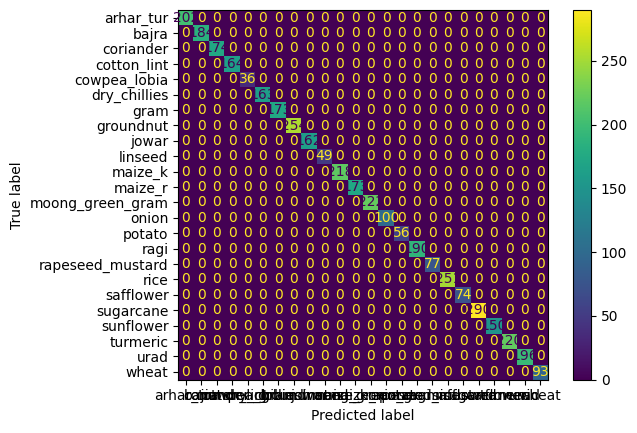

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,ConfusionMatrixDisplay

classifier = RandomForestClassifier(n_estimators=100,random_state=2022)
classifier.fit(x_train,y_train)
y_pred_forest=classifier.predict(x_test)

predicted_values = y_pred_forest
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Random Forest')
print("Random forest Accuracy is: ", x*100)
matrix_plot=confusion_matrix(y_test, y_pred_forest, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred_forest))
#saving model
pickle.dump(classifier, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/forest_classifier.pkl", "wb"))

In [29]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2022,max_depth=5)

DecisionTree.fit(x_train,y_train)

predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))
#saving model
pickle.dump(DecisionTree, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/DecisionTree_classifier.pkl", "wb"))

DecisionTrees's Accuracy is:  97.62335313872384
                  precision    recall  f1-score   support

       arhar_tur       1.00      1.00      1.00       202
           bajra       1.00      1.00      1.00       184
       coriander       1.00      1.00      1.00       174
     cotton_lint       1.00      1.00      1.00       164
    cowpea_lobia       0.00      0.00      0.00        36
    dry_chillies       1.00      1.00      1.00       163
            gram       1.00      1.00      1.00       173
       groundnut       1.00      1.00      1.00       254
           jowar       1.00      1.00      1.00       162
         linseed       0.58      1.00      0.73        49
         maize_k       1.00      1.00      1.00       218
         maize_r       1.00      1.00      1.00       173
moong_green_gram       1.00      1.00      1.00       222
           onion       1.00      1.00      1.00       100
          potato       0.00      0.00      0.00        56
            ragi       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving model
pickle.dump(NaiveBayes, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/NaiveBayes_classifier.pkl", "wb"))

Naive Bayes's Accuracy is:  1.0
                  precision    recall  f1-score   support

       arhar_tur       1.00      1.00      1.00       202
           bajra       1.00      1.00      1.00       184
       coriander       1.00      1.00      1.00       174
     cotton_lint       1.00      1.00      1.00       164
    cowpea_lobia       1.00      1.00      1.00        36
    dry_chillies       1.00      1.00      1.00       163
            gram       1.00      1.00      1.00       173
       groundnut       1.00      1.00      1.00       254
           jowar       1.00      1.00      1.00       162
         linseed       1.00      1.00      1.00        49
         maize_k       1.00      1.00      1.00       218
         maize_r       1.00      1.00      1.00       173
moong_green_gram       1.00      1.00      1.00       222
           onion       1.00      1.00      1.00       100
          potato       1.00      1.00      1.00        56
            ragi       1.00      1.00  

In [31]:
from sklearn.svm import SVC

SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train,y_train)
predicted_values = SVM.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)

acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving the model
pickle.dump(SVM, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/SVM.pkl", "wb"))

SVM's Accuracy is:  0.9987083440971325
                  precision    recall  f1-score   support

       arhar_tur       1.00      1.00      1.00       202
           bajra       1.00      1.00      1.00       184
       coriander       1.00      1.00      1.00       174
     cotton_lint       1.00      1.00      1.00       164
    cowpea_lobia       1.00      0.86      0.93        36
    dry_chillies       1.00      1.00      1.00       163
            gram       1.00      1.00      1.00       173
       groundnut       1.00      1.00      1.00       254
           jowar       1.00      1.00      1.00       162
         linseed       1.00      1.00      1.00        49
         maize_k       1.00      1.00      1.00       218
         maize_r       1.00      1.00      1.00       173
moong_green_gram       0.98      1.00      0.99       222
           onion       1.00      1.00      1.00       100
          potato       1.00      1.00      1.00        56
            ragi       1.00     

In [ ]:
# !pip uninstall xgboost 

# # !pip install xgboost==0.90

# import xgboost as xgb
# XB = xgb.XGBClassifier()
# XB.fit(x_train,y_train)

# predicted_values = XB.predict(x_test)

# x = metrics.accuracy_score(y_test, predicted_values)
# acc.append(x)
# model.append('XGBoost')
# print("XGBoost's Accuracy is: ", x)

# print(classification_report(y_test,predicted_values))
# #saving the model
# pickle.dump(XB, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/XB.pkl", "wb"))

In [32]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2022)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

#saving the model
pickle.dump(LogReg, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/LogReg.pkl", "wb"))

Logistic Regression's Accuracy is:  0.999483337638853
                  precision    recall  f1-score   support

       arhar_tur       1.00      1.00      1.00       202
           bajra       1.00      1.00      1.00       184
       coriander       1.00      1.00      1.00       174
     cotton_lint       1.00      1.00      1.00       164
    cowpea_lobia       1.00      0.94      0.97        36
    dry_chillies       1.00      1.00      1.00       163
            gram       1.00      1.00      1.00       173
       groundnut       1.00      1.00      1.00       254
           jowar       1.00      1.00      1.00       162
         linseed       1.00      1.00      1.00        49
         maize_k       1.00      1.00      1.00       218
         maize_r       1.00      1.00      1.00       173
moong_green_gram       0.99      1.00      1.00       222
           onion       1.00      1.00      1.00       100
          potato       1.00      1.00      1.00        56
            ragi 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('knn')
print("knn Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

#saving the model
pickle.dump(LogReg, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/knn.pkl", "wb"))

knn Accuracy is:  0.9987083440971325
                  precision    recall  f1-score   support

       arhar_tur       1.00      1.00      1.00       202
           bajra       1.00      1.00      1.00       184
       coriander       1.00      1.00      1.00       174
     cotton_lint       1.00      1.00      1.00       164
    cowpea_lobia       1.00      0.86      0.93        36
    dry_chillies       1.00      1.00      1.00       163
            gram       1.00      1.00      1.00       173
       groundnut       1.00      1.00      1.00       254
           jowar       1.00      1.00      1.00       162
         linseed       1.00      1.00      1.00        49
         maize_k       1.00      1.00      1.00       218
         maize_r       1.00      1.00      1.00       173
moong_green_gram       0.98      1.00      0.99       222
           onion       1.00      1.00      1.00       100
          potato       1.00      1.00      1.00        56
            ragi       1.00      1

In [34]:
df.sample(n=20, random_state=2022)

,avg_year_temp,ph,rainfall,sowing_temp,harvesting_temp,N,P,K,crop
13244,27.842835,9.573149,8.544850,25.300710,16.714840,0.000000,41.795438,0.000000,coriander
9974,22.297245,6.710052,34.677187,21.189865,28.480829,7.700928,25.122120,0.000000,rapeseed_mustard
15919,24.570230,6.906874,68.818068,18.848090,26.910563,18.571371,39.949754,19.486050,onion
784,16.103536,6.805529,92.114120,33.706342,24.828716,11.430211,28.051790,0.000000,cotton_lint
17510,25.986366,8.806913,9.642416,23.346636,23.171100,0.000000,40.076778,0.000000,coriander
2448,29.722937,5.802764,99.185111,32.811947,29.915884,22.050863,11.193675,10.234538,ragi
8879,26.319972,6.604351,19.998913,26.085260,22.392575,10.624812,50.282668,13.055247,rice
6647,30.511137,7.179801,61.788979,31.206168,35.499096,7.649112,14.031448,10.754457,arhar_tur
13681,24.931401,6.026592,38.719923,20.408188,29.825896,7.222019,22.040399,0.000000,rapeseed_mustard
6567,21.263365,7.078817,67.339581,25.537198,23.750700,10.974053,3.381371,0.000000,urad


In [39]:
#Loading and testing 

loaded_model=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/forest_classifier.pkl','rb'))
loaded_scale=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/scale.pkl','rb'))
data =loaded_scale.transform( np.array([[24.115815,	8.600399,	7.745665,	23.796676,	21.889624,1000,	42.592624,	0.000000	]]))
prediction = loaded_model.predict(data)
print(prediction)

['coriander']


In [40]:
dff=pd.read_csv('/content/drive/MyDrive/github/collegeproject/datasets/south_crop_class.csv')

In [41]:
dff['crop'].unique()

array(['arhar_tur', 'bajra', 'coriander', 'cotton_lint', 'dry_chillies',
       'gram', 'groundnut', 'jowar', 'maize_k', 'maize_r',
       'moong_green_gram', 'onion', 'potato', 'ragi', 'rice', 'sugarcane',
       'sunflower', 'turmeric', 'urad', 'wheat', 'linseed', 'safflower',
       'rapeseed_mustard', 'cowpea_lobia'], dtype=object)

In [42]:
x=dff.iloc[:,0:-1].values 
y=dff.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)

Inputs shape  (19354, 8)
Outputs shape  (19354,)


In [43]:
x=loaded_scale.transform(x)

Random forest Accuracy is:  100.0
                  precision    recall  f1-score   support

       arhar_tur       1.00      1.00      1.00      1064
           bajra       1.00      1.00      1.00       841
       coriander       1.00      1.00      1.00       867
     cotton_lint       1.00      1.00      1.00       974
    cowpea_lobia       1.00      1.00      1.00       181
    dry_chillies       1.00      1.00      1.00       650
            gram       1.00      1.00      1.00       895
       groundnut       1.00      1.00      1.00      1192
           jowar       1.00      1.00      1.00       756
         linseed       1.00      1.00      1.00       298
         maize_k       1.00      1.00      1.00      1093
         maize_r       1.00      1.00      1.00       862
moong_green_gram       1.00      1.00      1.00      1077
           onion       1.00      1.00      1.00       500
          potato       1.00      1.00      1.00       272
            ragi       1.00      1.00

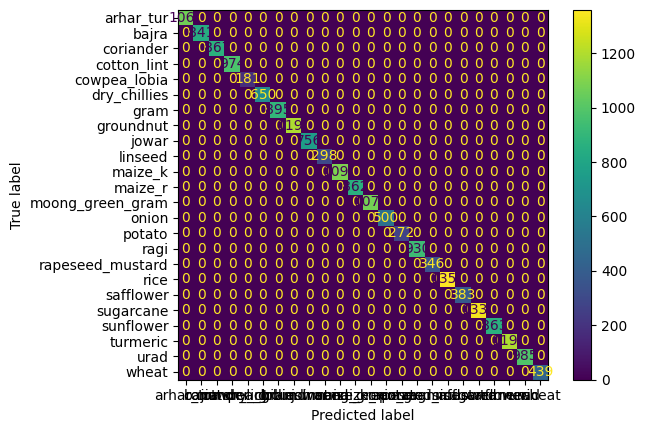

In [44]:
y_pred_forest=loaded_model.predict(x)

predicted_values = y_pred_forest
per = metrics.accuracy_score(y, predicted_values)

print("Random forest Accuracy is: ", per*100)
matrix_plot=confusion_matrix(y, y_pred_forest, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y, y_pred_forest))

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

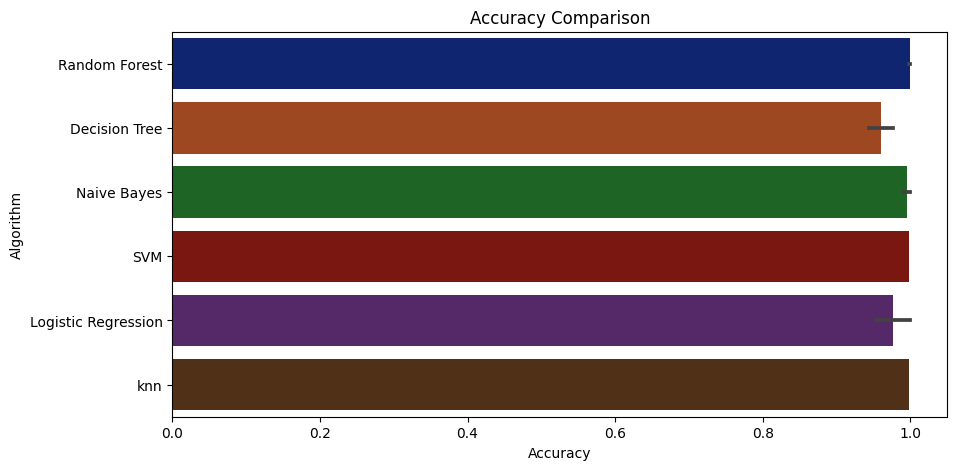

In [45]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')